# **Introduction**

# **Import Library**

In [189]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

In [190]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Attribute Information :**
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [192]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


# **Preparing Data**

**Missing Value**

In [193]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [194]:
# Handling missing value with mean 

m_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(m_bmi)

In [195]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Duplicated Value

In [196]:
df.duplicated().sum()


0

No Duplicated Value in this dataset

# **Exploratory Data Analysis**

In [197]:
cat_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married',
              'work_type', 'Residence_type', 'smoking_status']

num_columns = ['age', 'avg_glucose_level', 'bmi']


In [198]:
for i  in cat_columns:
  print(i)
  print(df[i].value_counts())
  print('')

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

hypertension
0    4612
1     498
Name: hypertension, dtype: int64

heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64

ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



**Categorical Columns**

In [16]:
# remove other value in gender
df = df[df['gender'] != 'Other']

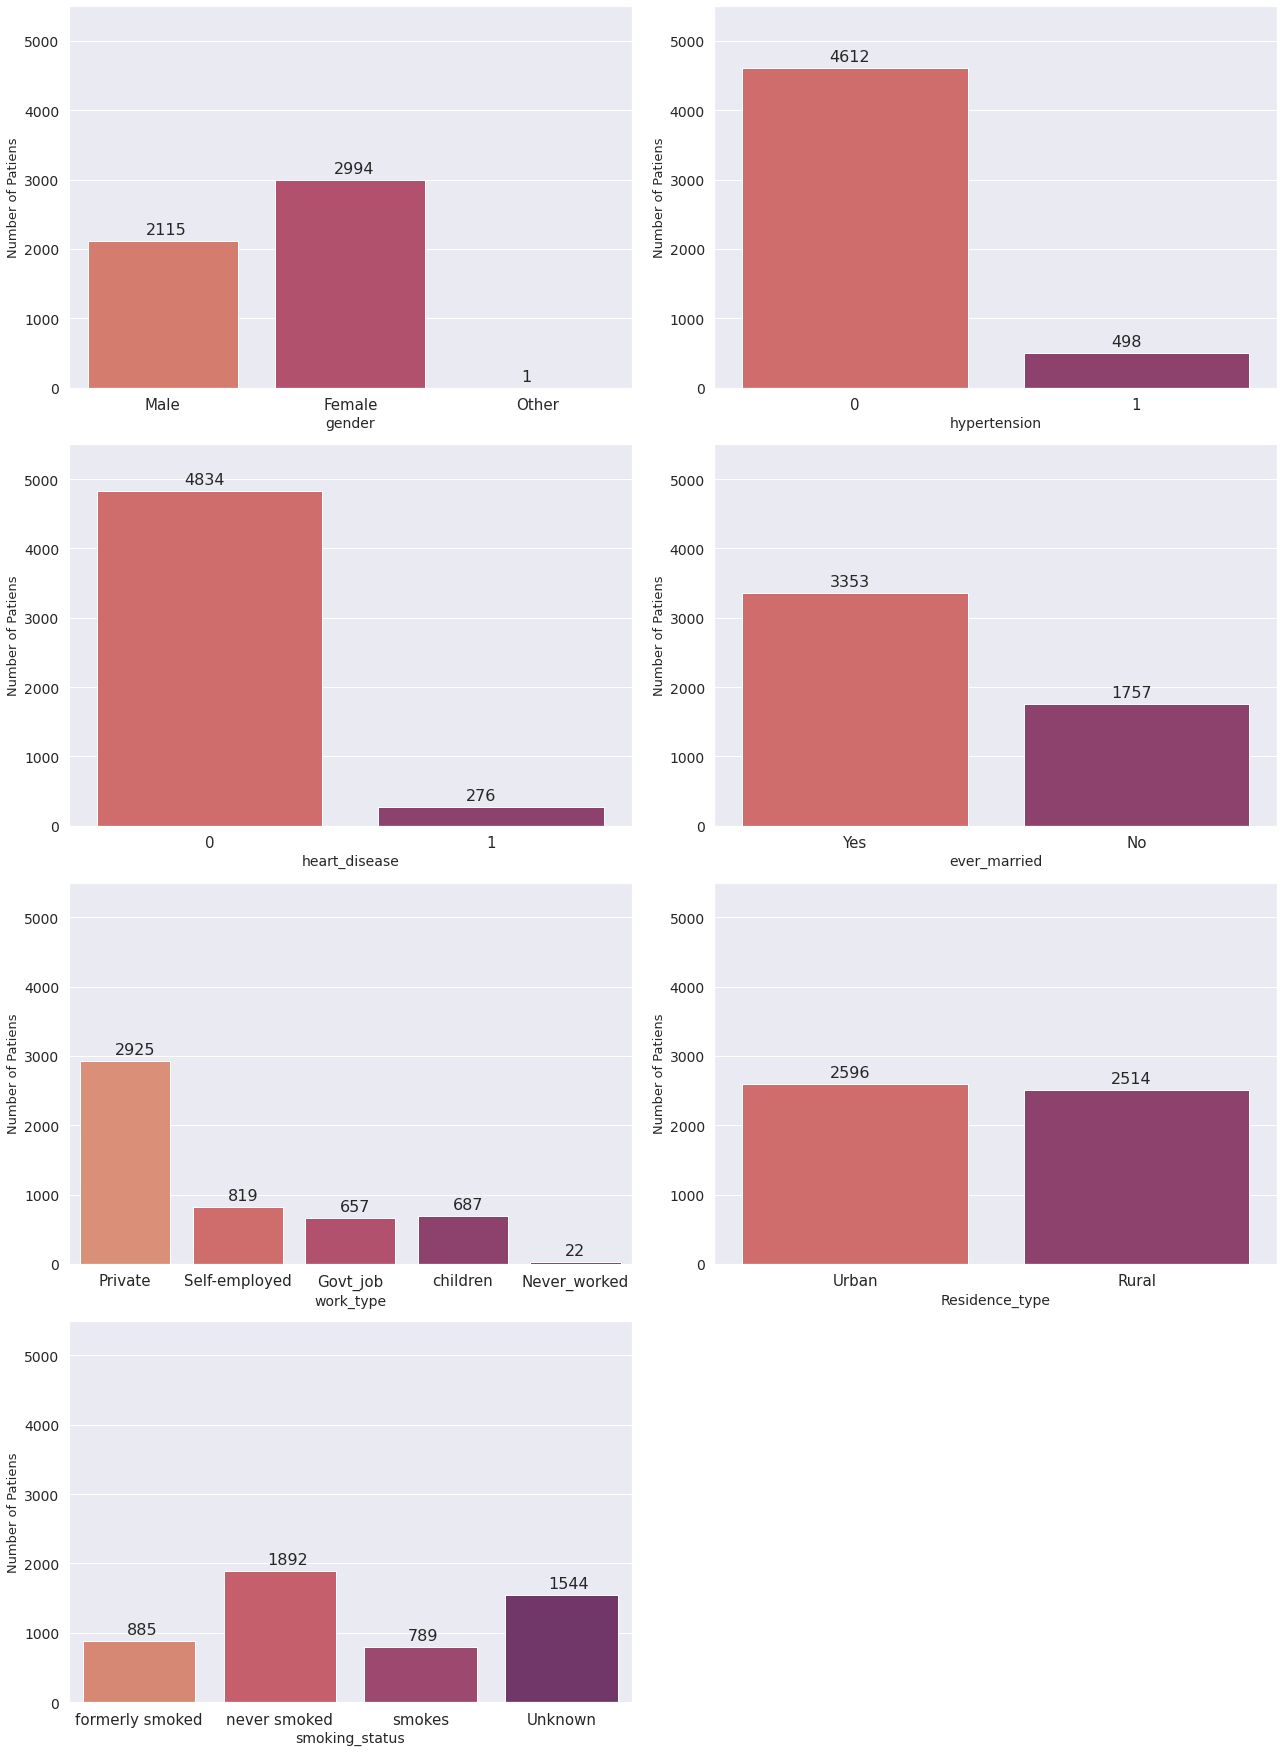

In [199]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,30))

for i,col in enumerate(cat_columns):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'flare')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patiens", fontsize= 13)
    plt.ylim(0,5500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+100), fontsize= 16)

plt.tight_layout()

plt.show()

**Insight :**
1.   More female patients than male patients but the difference is not much.
2.   Most of the patients do not have hypertension and heart disease.
3.   More than half of patients have ever been married
4.   Most of the patients are people who work in private companies
5.   There is not much difference between people living in rural and urban areas
6.   Most of the patients never smoked (but unknown categories also have a sizeable number)


**Stroke column**

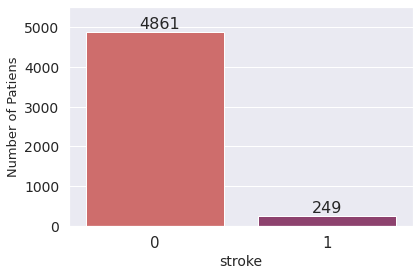

In [201]:
ax = sns.countplot(data = df, x = 'stroke', palette = 'flare')

plt.xlabel('stroke', fontsize= 14)
plt.ylabel("Number of Patiens", fontsize= 13)
plt.ylim(0,5500)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 14)

for p in ax.patches:
  ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+100), fontsize= 16)

plt.tight_layout()
plt.show()

* Number of people with strokes are less than 500 in number

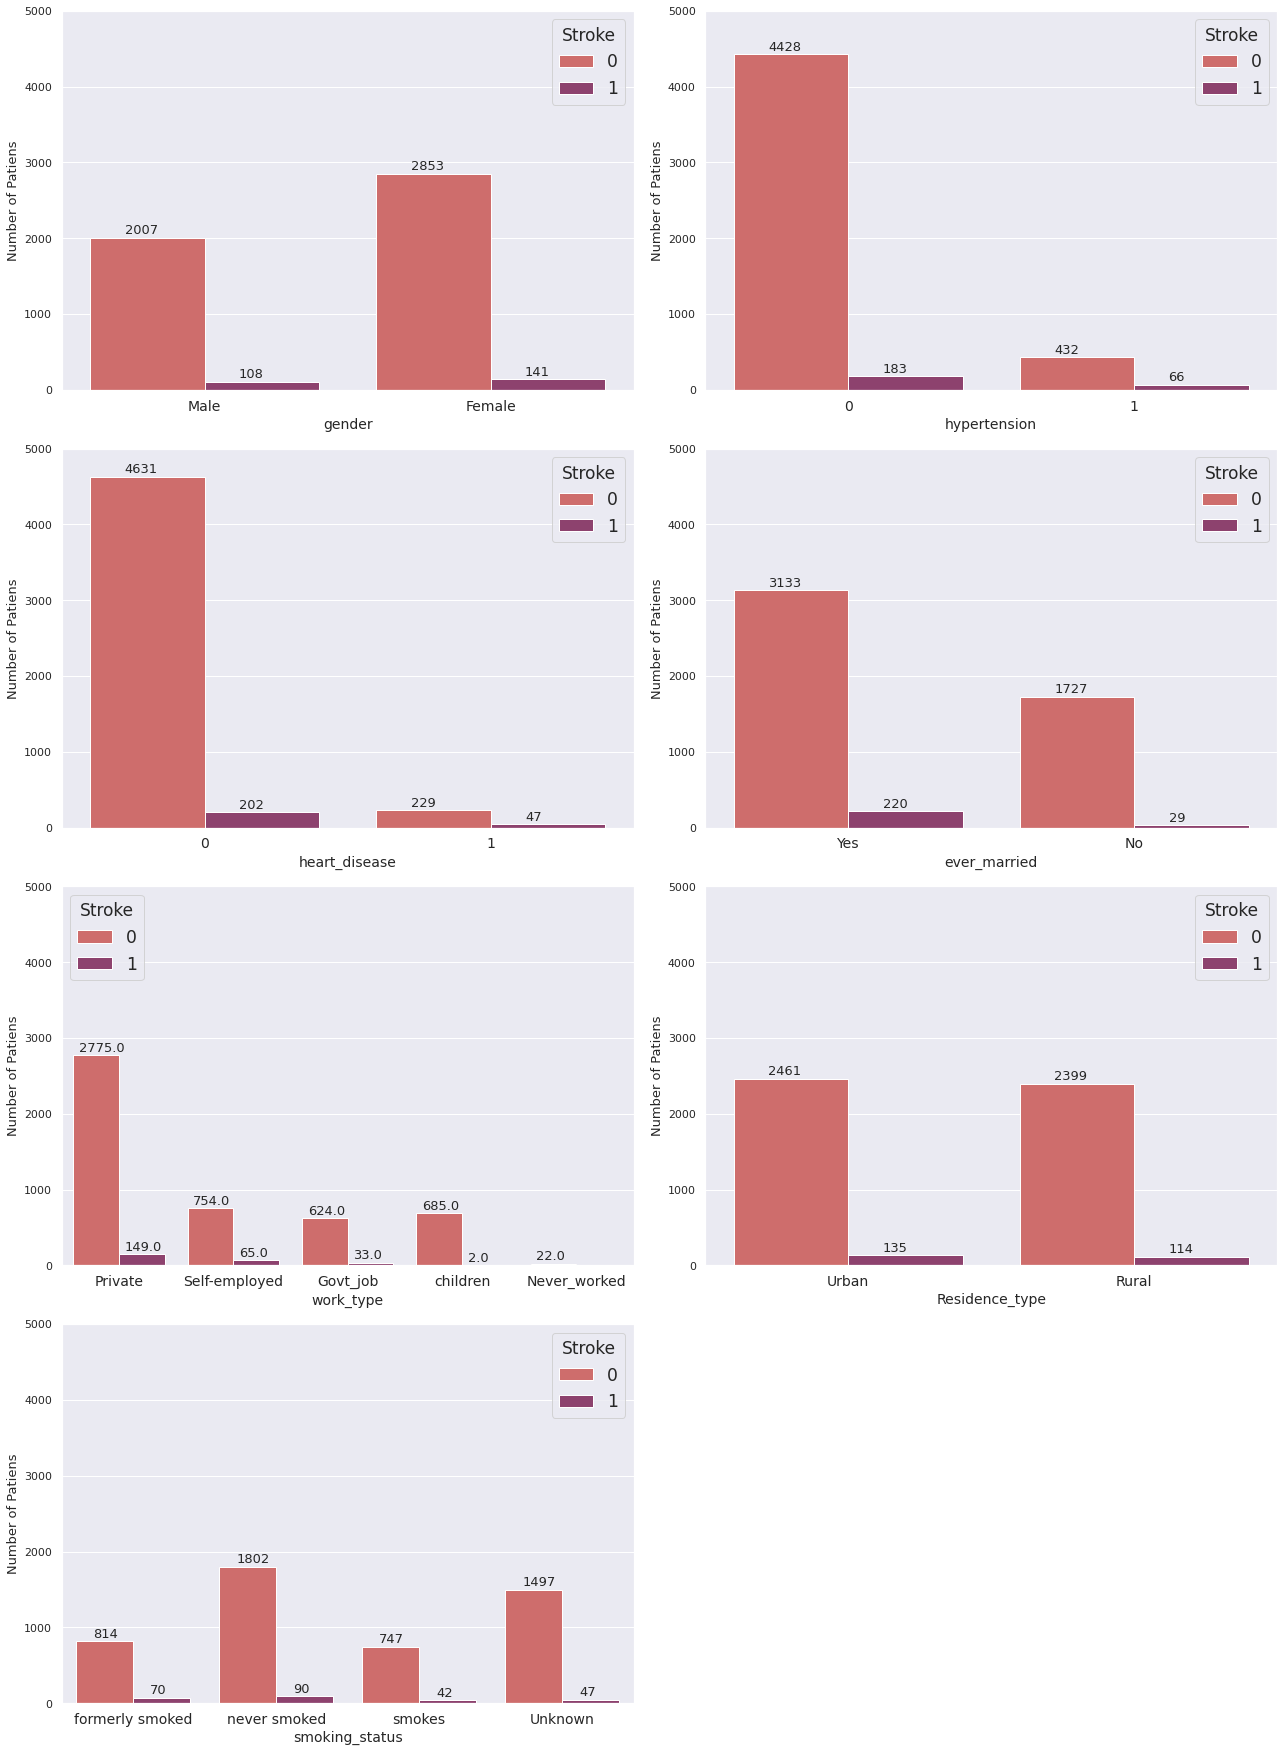

In [ ]:
plt.figure(figsize=(18,30))

for i,col in enumerate(cat_columns):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="stroke", palette = 'flare')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Number of Patiens", fontsize= 13)
    plt.xticks(fontsize= 14)
    plt.ylim(0,5000)
    plt.legend(title = 'Stroke', fontsize='x-large', title_fontsize='17')

    if col == 'work_type':
      for p in ax.patches:
          ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+50), fontsize= 13)
    else:
      for p in ax.patches:
          ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+50), fontsize= 13)

plt.tight_layout()

plt.show()

**Insight :**
1.   It seems that the number of male and female who suffer from stroke is almost the same.
2.   Patients with hypertension are more likely to have a stroke.
3.   Patients with heart disease are more likely to have a stroke too.
4.   Married patients are more likely to have a stroke.
5.   Self-employed have the highest ratio in stroke.
6.   There is not much difference between people living in rural and urban areas who have a stroke.
7.   There is not much difference between the four categories of smoking status on stroke.


**Numerical Column**

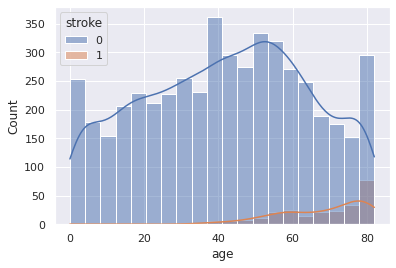

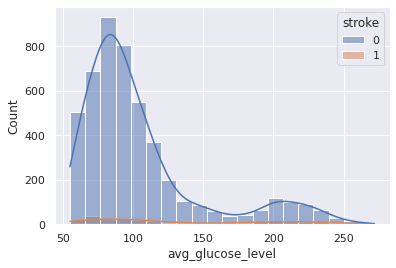

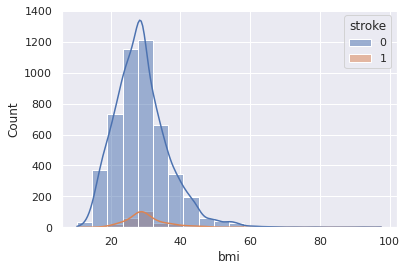

In [202]:
for col in num_columns:
  sns.histplot(data=df, x=col , hue='stroke', kde=True,bins = 20)
  plt.show()

**Insight :**
- Patients who have stroke are mostly adult people
- Patients with a BMI of 10 to 50 are more likely to have a stroke

**Pairplot Correlation**

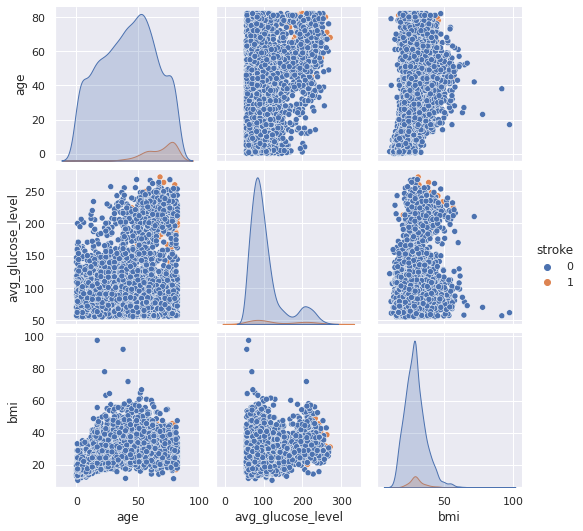

In [203]:
dfn = df[['age', 'avg_glucose_level', 'bmi','stroke']]
sns.pairplot(dfn, kind="scatter",hue = 'stroke')
plt.show()

**Heatmap Correlation**

In [204]:
correlation = dfn.corr()
correlation

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238171,0.325942,0.245257
avg_glucose_level,0.238171,1.000000,0.168751,0.131945
bmi,0.325942,0.168751,1.000000,0.038947
stroke,0.245257,0.131945,0.038947,1.000000


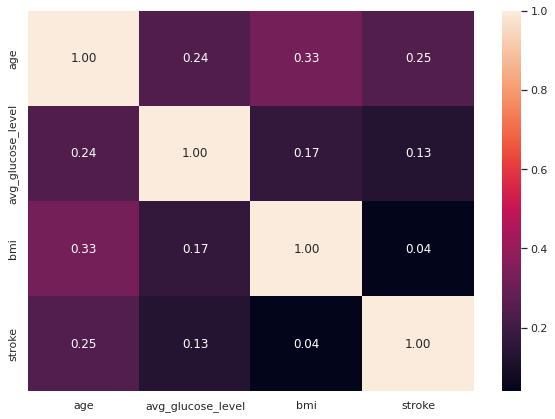

In [205]:
plt.figure(figsize=(10, 7))

sns.heatmap(correlation, annot=True, fmt='.2f')

**Insight :**
Each available feature does not have a high enough correlation to the target variable

# **Preprocessing Data**

In [159]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [160]:
df_cleaned = df
df_cleaned = df_cleaned.drop(columns=['id'])
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


Columns to be transformed:
1. Gender. If 'Female' then 0, if 'Male' then 1.
2. ever_marrie. If 'no' then 0, if 'yes' then 1.
3. work_type. Onehot
4. Residence_type. If 'Rural' then 0, if 'Urban' then 1.
5. smoking_status. Onehot

In [161]:
# encoding column

df_cleaned['gender'] = df_cleaned['gender'].map({'Female': 0, 'Male': 1}).astype('int')
df_cleaned['ever_married'] = df_cleaned['ever_married'].map({'No': 0, 'Yes': 1}).astype('int')
df_cleaned['Residence_type'] = df_cleaned['Residence_type'].map({'Rural': 0, 'Urban': 1}).astype('int')

df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [163]:
# One-Hot encoding for smoking_status

onehot_columns = ['smoking_status']
df_cleaned = pd.get_dummies(df_cleaned, columns = onehot_columns)

df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


In [162]:
# One-Hot encoding for work_type

onehot_columns = ['work_type']
df_cleaned = pd.get_dummies(df_cleaned, columns = onehot_columns)

df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,never smoked,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,0,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,0,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,0,0,0,1,0


**Scaling Data**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# df_cleaned[['age','avg_glucose_level','bmi']] =  scaler.fit_transform(df_cleaned[['age','avg_glucose_level','bmi']])
# df_cleaned.head()

In [165]:
from sklearn.preprocessing import MinMaxScaler
scalers = MinMaxScaler()

df_cleaned[['age','avg_glucose_level','bmi']] =  scalers.fit_transform(df_cleaned[['age','avg_glucose_level','bmi']])
df_cleaned.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.816895,0,1,1,1,0.801265,0.301260,1,0,0,1,0,0,0,1,0,0
1,0,0.743652,0,0,1,0,0.679023,0.212981,1,0,0,0,1,0,0,0,1,0
2,1,0.975586,0,1,1,0,0.234512,0.254296,1,0,0,1,0,0,0,0,1,0
3,0,0.597168,0,0,1,1,0.536008,0.276060,1,0,0,1,0,0,0,0,0,1
4,0,0.963379,1,0,1,0,0.549349,0.156930,1,0,0,0,1,0,0,0,1,0


In [166]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_Self-employed         51

In [167]:
df_cleaned['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

It can be seen that our data is imbalanced in the target variable column.

# **Split Data**

In [168]:
from sklearn.model_selection import train_test_split

X_data = df_cleaned.drop(columns='stroke')
y_data = df_cleaned[['stroke']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=42)

# **Handle Imbalance Data**

In [169]:
# import random oversampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train['stroke']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_SMOTE['stroke']))

Counter({0: 3662, 1: 169})
Counter({0: 3662, 1: 3662})


# **Modeling**

**Evaluation function**

In [170]:
def evaluate(model, x_test = X_test, y_test = y_test):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

#### **K-Nearest Neighbor**

In [176]:
knn_model = KNeighborsClassifier(n_neighbors = 101)
knn_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(knn_model)

Accuracy: 0.6643192488262911
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.66      0.79      1198
           1       0.12      0.71      0.21        80

    accuracy                           0.66      1278
   macro avg       0.55      0.69      0.50      1278
weighted avg       0.92      0.66      0.75      1278

------
Assuming 1 as positive, we get:

True Positive: 57
True Negative: 792
False Positive: 406
False Negative: 23

Precision: 0.12311015118790497
Recall: 0.7125
F1-Score: 0.20994475138121546


#### **Random Forest**

In [182]:
RF_model = RandomForestClassifier(criterion = 'gini', n_estimators=100, max_depth=5, random_state=42, n_jobs = -1)
RF_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(RF_model)

Accuracy: 0.7284820031298904
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.98      0.73      0.83      1198
           1       0.16      0.76      0.26        80

    accuracy                           0.73      1278
   macro avg       0.57      0.74      0.55      1278
weighted avg       0.93      0.73      0.80      1278

------
Assuming 1 as positive, we get:

True Positive: 61
True Negative: 870
False Positive: 328
False Negative: 19

Precision: 0.15681233933161953
Recall: 0.7625
F1-Score: 0.2601279317697228


#### **Logistic Regression**

In [183]:
LR_model = LogisticRegression()
LR_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(LR_model)

Accuracy: 0.7769953051643192
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.78      0.87      1198
           1       0.17      0.69      0.28        80

    accuracy                           0.78      1278
   macro avg       0.57      0.74      0.57      1278
weighted avg       0.92      0.78      0.83      1278

------
Assuming 1 as positive, we get:

True Positive: 55
True Negative: 938
False Positive: 260
False Negative: 25

Precision: 0.1746031746031746
Recall: 0.6875
F1-Score: 0.27848101265822783


#### **Decision Tree**

In [187]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(DT_model)

Accuracy: 0.837245696400626
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1198
           1       0.12      0.25      0.16        80

    accuracy                           0.84      1278
   macro avg       0.53      0.56      0.54      1278
weighted avg       0.89      0.84      0.86      1278

------
Assuming 1 as positive, we get:

True Positive: 20
True Negative: 1050
False Positive: 148
False Negative: 60

Precision: 0.11904761904761904
Recall: 0.25
F1-Score: 0.16129032258064516


**Conclusion:**
1.   Item daftar
2.   Item daftar

